# Women's Clothing Reviews

## E-commerce clothing review analysis part 1

# Table of Contents
* 1. [Introduction](#first-bullet)
    * 1.1 [Problem](#second-bullet)
    * 1.2 [Target Readers](#third-bullet)
    * 1.3 [Data Source](fifth-bullet)
* 2. [Import Modules](sixth-bullet)
* 3. [Data Wrangling](seventh-bullet)
    * 3.1 [Import Data](eigth-bullet)
    * 3.2 [Create Feature](ninth-bullet)
* 4. [Exploratory Data Analysis](tenth-bullet) 
    * 4.1 [Analyzing reviews and recommendation of clothing item](eleventh-bullet)
    * 4.2 [Comparison of age and sentiment of consumer](twelveth-bullet)
    * 4.3 [Reviews WordCloud](thirteenth-bullet)
    * 4.4 [Positive feedback count](fourteenth-bullet)
* 5. [Text Processing](fifteenth-bullet)

# Introduction

## Problem:
The current reality of the apparel industry is that less and less consumers are frequenting brick and mortar establishments. Customers are finding themselves drawn more towards online shopping and e-commerce for its ease and convenience. A unique problem that is arising from e-commerce, particularly for the apparel industry, is how customers are deciding on specific products without physically seeing, touching, or trying on articles of clothing. As a result, reviews are the go to resource when making decisions on whether to buy something or not. Reviews are not only important for consumers, but also for any online retail. They rely on reviews to generate interest and profit on a particular item. 

Reviews can be extensive and oftentimes contain irrelevant information. Can we compress the data to improve the product? Can we take the reviews and predict other consumer feedback? From reviews, online retailers can improve the quality of their product to satisfy consumers and increase profit and credibility. 

## Target Readers:

### -Online Retailers (Amazon, Target, Walmart, Ebay, etc.)
Use this report to improve products and increase profit and credibility.

### -Online customers
Consider this report as a reference for quality reviews and key words for choosing a product or online retailer.


## Data Source:
Data was obtained from a Kaggle competition, in csv format, through the following link: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

# Import Modules

In [1]:
#import basic packages
import numpy as np
import pandas as pd

In [2]:
#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [32]:
#import text packages
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from textblob import TextBlob, Word

# import word cloud module 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# import sklearn modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
# import stats modules
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

# Data Wrangling

## Import data

In [6]:
#read file
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [7]:
#explore data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 22628 non-null int64
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Title                      19662 non-null object
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommended IND            22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


A quick look at the data shows that there was 23486 observations with a total of 11 columns. However, the heart of this analysis is in the review text. As a result, missing values in the reveiw text was removed. 

## Create Feature

In [10]:
#set new variable
#create negative and positive reviews based on rating
df["Label"] = 0 #negative reviews
df.loc[df.Rating >= 3, ['Label']] = 1 #positive reviews

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


# Exploratory Data Analysis

## Analyzing reviews and recommendations of clothing items

### What clothing item gets reviewed the most?

In [11]:
#determine count of specific clothing item
df['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Chemises             1
Casual bottoms       1
Name: Class Name, dtype: int64

Text(0.5,1,'Frequency Count of Clothing Item')

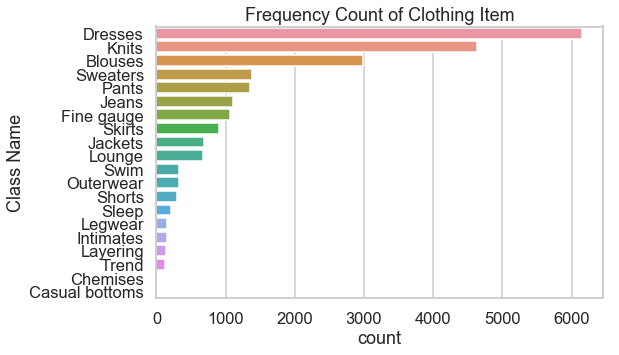

In [12]:
#create plot
plt.subplots(figsize=(8,5))
sns.countplot(y='Class Name', data=df, order=df['Class Name'].value_counts().index)
plt.title('Frequency Count of Clothing Item')

Here we see that dresses, knits, and blouses get reviewed the most. 

### What items get recommended the most?

In [13]:
#create dataframe for recommended items only
df_rec = df[df['Recommended IND']==1]

Text(0.5,1,'Frequency Count of Recommended Clothing Item')

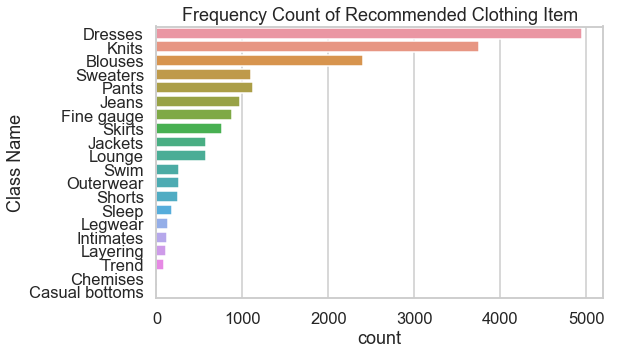

In [14]:
#create plot 
plt.subplots(figsize=(8,5))
sns.countplot(y='Class Name', data=df_rec, order=df['Class Name'].value_counts().index)
plt.title('Frequency Count of Recommended Clothing Item')

The most reviewed items are also the most recommended items. Dresses, knits, and blouses are the top three most reviewed and recommended items. Next, let's check out if other consumers thought these reviews were good.

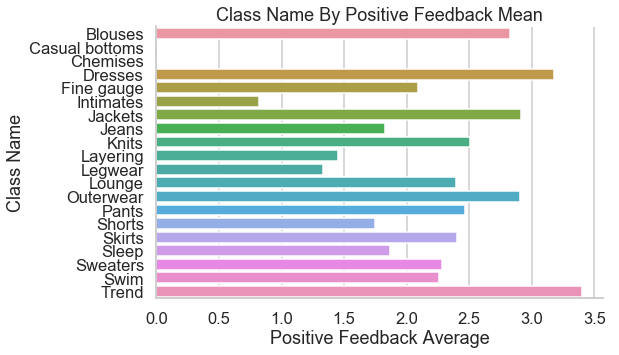

In [15]:
#check clothing item by positive feedback average
data = df.groupby('Class Name')['Positive Feedback Count'].mean().reset_index()
data.head()

fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(x='Positive Feedback Count', y='Class Name', data=data)
plt.title('Class Name By Positive Feedback Mean')
plt.xlabel('Positive Feedback Average')
sns.despine()

#### Class Name Summary: 
Blouses, dresses and knits are the top three most reviewed and recommended clothing items. They are also the clothing items with the most positive feedback from reviews. This makes sense because more people are spending time writing reviews and recommending these items. This also shows that most consumers are interested in blouses, dresses and knits. Retailers can build on this and determine what makes these clothing items so popular among women. On average though, trend receives the most positive feedback.

### What is the age distribution of these consumers?

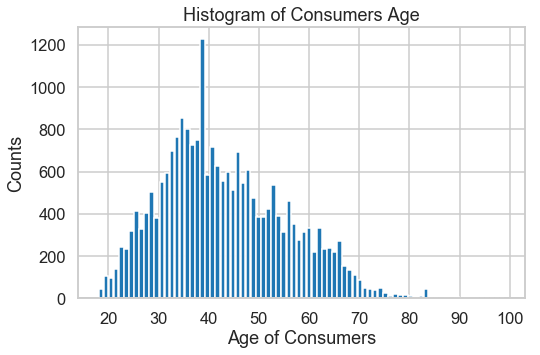

In [16]:
#plot histogram of age
df.Age.hist(bins=80, figsize=(8,5), rwidth=0.9)
plt.xlabel('Age of Consumers')
plt.ylabel('Counts')
plt.title('Histogram of Consumers Age')
plt.rcParams['axes.axisbelow']=True

Text(0.5,1,'Negative and Positive Ratings by Age')

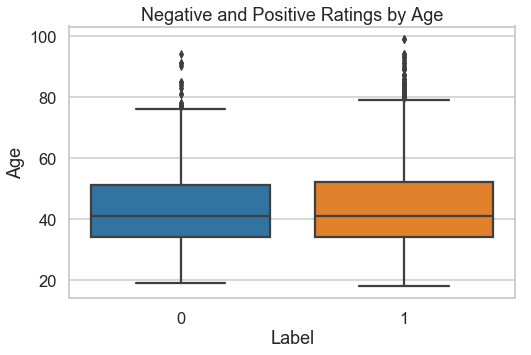

In [17]:
#look at negative or positive reviews by age.
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Label', y = 'Age', data = df)
plt.title('Negative and Positive Ratings by Age')

Text(0.5,1,'Class Name Reviews by Age')

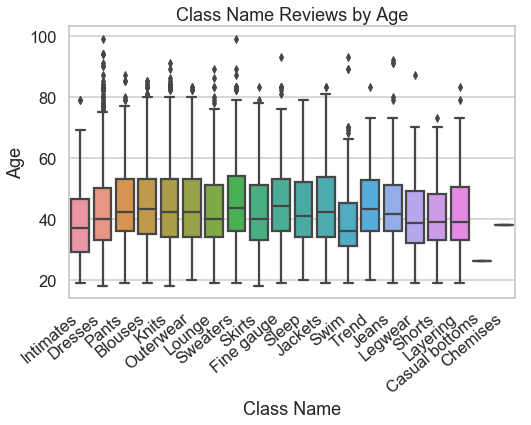

In [18]:
#check age distribution by class name
plt.figure(figsize=(8,5))
plt.xticks(rotation=40, ha="right")
sns.boxplot(x = 'Class Name', y = 'Age', data = df)
plt.title('Class Name Reviews by Age')

#### Age Summary:
The age range of consumers is between 20 and 85 years old. That's quite the range! We see that majority of consumers are between 35-40 years old. The negative and positive review ratings are pretty close in median age based on the boxplot above. A check of age distribution based on class name tells us that the top three items are reviewed by a median age of 40. From this EDA we know that our main target audience are 40 year old females.

### Are there any patterns in the consumer review narratives?

In [19]:
#view review length
df['Review Length'] = df['Review Text'].apply(len)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,192


C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


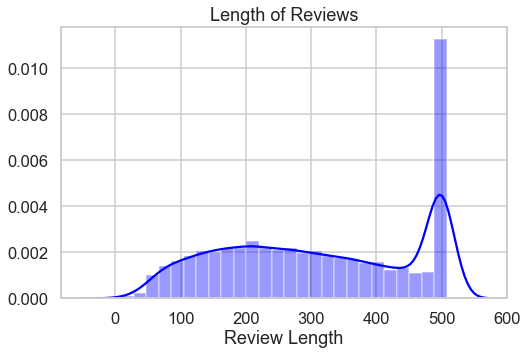

In [20]:
fig = plt.figure(figsize=(8, 5))
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")

This is interesting. There is a spike at 500; which probably indicates that the max lenth of characters is 500.

Text(0.5,1,'Review Length in each Class')

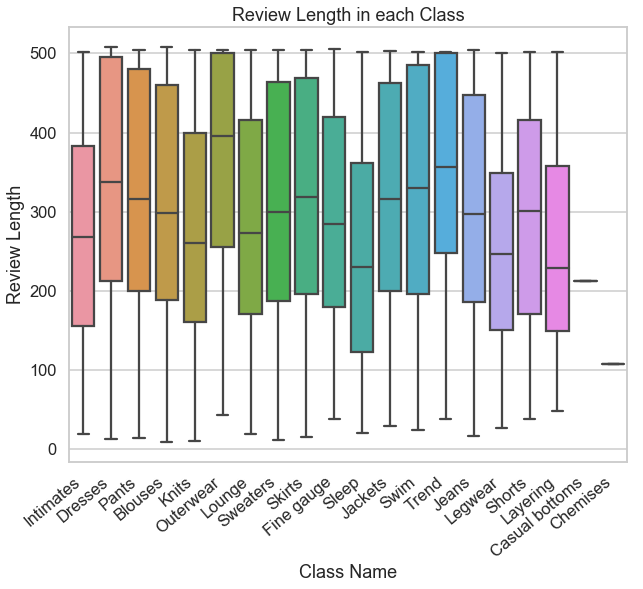

In [21]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=40, ha="right")
sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
plt.title("Review Length in each Class")

Above shows the breakdown of review lengths for each clothing item in this review data set. Of the top three most reviewed and recommended item, dresses had the highest median review length then blouses and knits. Outerwear has the highest median review length. Probably due to price, commitment and details.

In [41]:
data = pd.concat([df['Review Length'], df['Positive Feedback Count']], axis=1)
data.corr()

,Review Length,Positive Feedback Count
Review Length,1.000000,0.191053
Positive Feedback Count,0.191053,1.000000


In [40]:
#check statistical significance of review length and positive feedback count
stats.ttest_ind(df['Review Length'].dropna(), df['Positive Feedback Count'].dropna(),  equal_var = False)

Ttest_indResult(statistic=319.6789550117849, pvalue=0.0)

Review length and positive feedback count share a positive correlation meaning the more words in a review, the more likely another consumer will find the review positive. With a pvalue of 0.0, we can say that the correlation between review length and positive feedback is statistically significant in this dataset. Online retailers should consider increasing their word count limit.

In [45]:
#check difference between negative and positive rating as it relates to review length
pos_rate=df[df['Label']==1]['Review Length'].mean()
neg_rate=df[df['Label']==0]['Review Length'].mean()
(neg_rate-pos_rate)/neg_rate

0.017221968656046915

In [44]:
#determine if there is a statistical significance between review length and rating label
stats.ttest_ind(df['Review Length'].dropna(), df['Label'].dropna(), equal_var=False)

Ttest_indResult(statistic=321.75139592110685, pvalue=0.0)

This is pretty interesting. The difference between negative and positive reviews is 0.017; meaning the average review length for a negative review is more than a positive review. I guess this just means consumers who give a low rating are writing more about the product. This is beneficial because it'll give the retailers more information about how to improve.

(-0.5, 399.5, 199.5, -0.5)

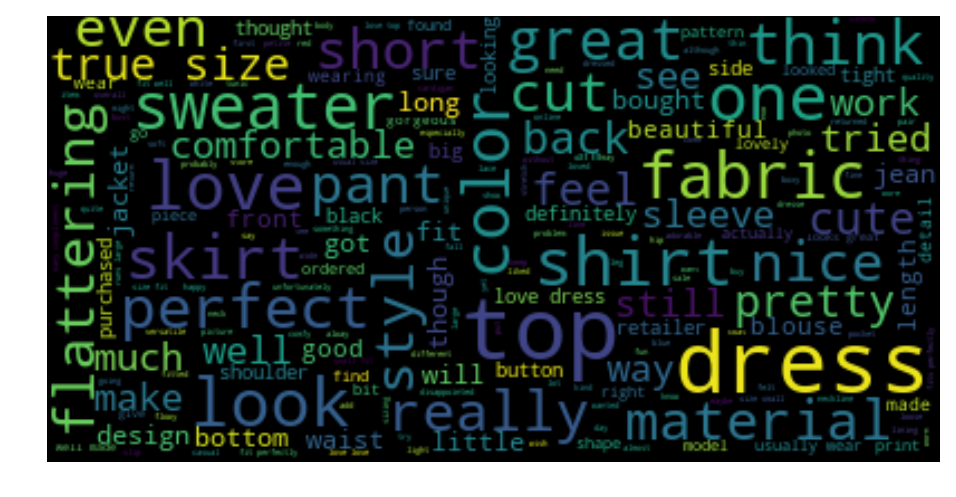

In [22]:
# Word cloud from reviews
all_tags = []
for iter_row, row in df.iterrows():
    my_tags = row['Review Text'].split(',')
    for tag in my_tags:
        all_tags.append(tag)


#Read the whole text.
text = ' '.join(all_tags)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Review Narratives Summary:
Overall we see there is a limit to the character count of each review, 500. The top three choices have character range of 250-350, with outerwear having the most characters. 

The word cloud gives an impression of what is mentioned most in the reviews. We see that most of the words focus on type of clothing and fit of clothing. This also shows what the consumers care about most as well. 

## Review Text pre-processing

In [24]:
#check average words used in each review text
#function to find average words in each reivew text
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['Avg_word'] = df['Review Text'].apply(lambda x: avg_word(x))
df[['Review Text','Avg_word']].head()

,Review Text,Avg_word
0,Absolutely wonderful - silky and sexy and comf...,5.750000
1,Love this dress! it's sooo pretty. i happene...,3.822581
2,I had such high hopes for this dress and reall...,4.112245
3,"I love, love, love this jumpsuit. it's fun, fl...",4.681818
4,This shirt is very flattering to all due to th...,4.361111


Text(0.5,1,'Average word in each Class')

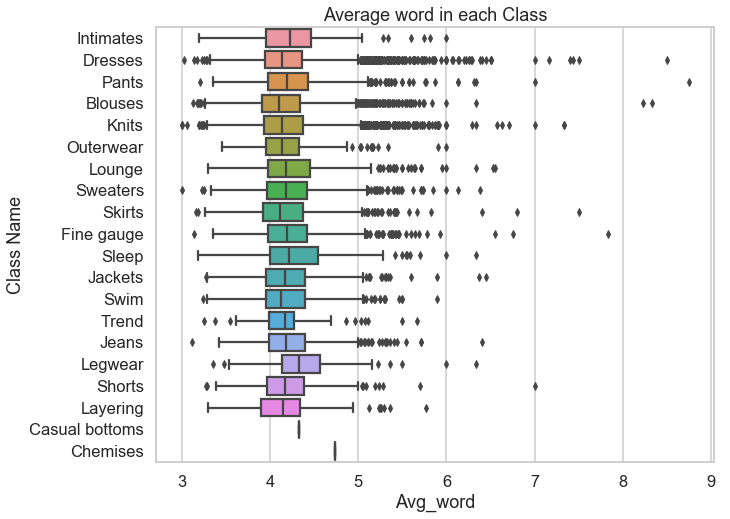

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(y = 'Class Name', x = 'Avg_word', data = df)
plt.title("Average word in each Class")

It appears the median average word for each clothing item are pretty close together whereas the review length had more varying differences.  

In [46]:
#lowercase all words in review text
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation from review text
df['Review Text'] = df['Review Text'].str.replace('[^\w\s]','')

#remove stopwords
stop = stopwords.words('english')
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#find common words
freq = pd.Series(' '.join(df['Review Text']).split()).value_counts()[:10]

#remove these common words as they do not add value to the analysis
freq = list(freq.index)
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#check for rare words
freq = pd.Series(' '.join(df['Review Text']).split()).value_counts()[-10:]

#remove rare words as they get dominated by noise
freq = list(freq.index)
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

df['Review Text'].head()

0                      absolutely wonderful silky sexy
1    sooo pretty happened find store glad bc never ...
2    high hopes wanted work initially petite usual ...
3    jumpsuit fun flirty fabulous every time get no...
4    shirt due adjustable front tie length leggings...
Name: Review Text, dtype: object

In [47]:
#calculate tfidf
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
review_vect = tfidf.fit_transform(df['Review Text'])
review_vect

<22628x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 340248 stored elements in Compressed Sparse Row format>

In [48]:
#create bag of words for each review
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
review_bow = bow.fit_transform(df['Review Text'])
review_bow

<22628x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 388743 stored elements in Compressed Sparse Row format>

In [49]:
#determine sentiment of each review:
df['Sentiment'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Review Text','Sentiment']].head()

,Review Text,Sentiment
0,absolutely wonderful silky sexy,0.750000
1,sooo pretty happened find store glad bc never ...,0.366667
2,high hopes wanted work initially petite usual ...,0.003787
3,jumpsuit fun flirty fabulous every time get no...,0.350000
4,shirt due adjustable front tie length leggings...,-0.125000


### Does sentiment of review text have an effect on positive feedback count and recommendation?

In [51]:
#check correlation between sentiment and positive feedback count.
sent_pos = pd.concat([df['Sentiment'], df['Positive Feedback Count'], df['Recommended IND']], axis=1)
sent_pos.corr()

,Sentiment,Positive Feedback Count,Recommended IND
Sentiment,1.000000,-0.033355,0.220025
Positive Feedback Count,-0.033355,1.000000,-0.065833
Recommended IND,0.220025,-0.065833,1.000000


The correlation between these three variables are as expected. A negative sentiment leads to less positive feedback whereas a positive sentiment tends to result in more recommendation. This is beneficial for retailers in the sense that people are predictable.